In [20]:
import pandas as pd
import os
import io

In [21]:
data_path = "/Users/anasouza/ppgeb_masters/data/teste_ana_13_08.txt"

In [22]:
data_list = []
with io.open(data_path, mode="r", encoding="utf-8") as f:
    for line in f:
        data_list.append(line.rstrip().split())

In [23]:

def replace_blink_values(val):
    if val != 0:
        x = 500
    else:
        x = 0
    return x


def identificar_blink_eeg(val):
    try: 
        x = int(val)
        if x > 150:
            return 500
        else:
            return val
    except:
        return val


def clean_dataset(data_list):
    df = pd.DataFrame(data_list)
    df.columns=df.iloc[0] 
    df = df.iloc[1:]
    df.iloc[-1,-1] = df.iloc[-1,3]
    df.USER = df.USER.replace("START_RECORDING", 100).replace("STOP_EYETRACKER", 200)
    df = df.loc[df["USER"] != "CLIENT2_READY"]
    df = df.loc[df.USER.notnull()]

    df.USER = df.USER.astype(int)
    df.BKID = df.BKID.astype(float)

    df["BKID"] = df.BKID.apply(replace_blink_values)
    df['USER'] = df.USER.apply(identificar_blink_eeg)

    df["BKID"] = df["BKID"].astype("object")
    df["USER"] = df["USER"].astype("object")
    df["USER"] = df["USER"].astype("object")

    eeg = df.iloc[:,[2,-1]]
    et = df.iloc[:,:-1]

    return df, eeg, et

In [24]:
df, eeg, et = clean_dataset(data_list)

In [26]:
et

,DATATYPE,CNT,TIME,LPCX,LPCY,LPD,LPS,LPV,RPCX,RPCY,...,LPUPILD,LPUPILV,REYEX,REYEY,REYEZ,RPUPILD,RPUPILV,BKID,BKDUR,BKPMIN
1,SMP,32862,572.27344,0.32147,0.67821,10.64522,1.23506,1,0.64630,0.67333,...,0.00327,1,0.02708,-0.02222,0.67343,0.00396,1,0,0.00000,33
2,SMP,32863,572.28992,0.32163,0.67831,10.79239,1.23506,1,0.64693,0.67301,...,0.00320,1,0.02708,-0.02222,0.67343,0.00374,1,0,0.00000,33
3,SMP,32864,572.30640,0.32212,0.67824,10.80954,1.23506,1,0.64766,0.67312,...,0.00306,1,0.02718,-0.02226,0.67273,0.00357,1,0,0.00000,33
4,SMP,32865,572.32269,0.32309,0.67758,10.49753,1.23506,1,0.64744,0.67395,...,0.00320,1,0.02718,-0.02226,0.67273,0.00373,1,0,0.00000,33
5,SMP,32866,572.33911,0.32319,0.67770,10.77693,1.23506,1,0.64765,0.67349,...,0.00314,1,0.02718,-0.02226,0.67273,0.00384,1,0,0.00000,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2779,SMP,34612,601.64069,0.35819,0.64350,10.28098,1.33797,1,0.67533,0.65114,...,0.00312,1,0.03366,-0.02008,0.69332,0.00385,1,0,0.00000,32
2780,SMP,34613,601.64795,0.35810,0.64344,10.50952,1.33797,1,0.67544,0.65110,...,0.00312,1,0.03366,-0.02008,0.69332,0.00381,1,0,0.00000,32
2781,SMP,34614,601.66425,0.35800,0.64329,10.51575,1.33797,1,0.67519,0.65128,...,0.00322,1,0.03366,-0.02008,0.69332,0.00383,1,0,0.00000,32
2782,SMP,34615,601.68066,0.35680,0.64281,10.60914,1.33797,1,0.67507,0.65097,...,0.00297,1,0.03226,-0.01933,0.67364,0.00342,1,0,0.00000,32


In [31]:
eeg["USER"]

0
TIME    object
USER    object
dtype: object

In [27]:
eeg.to_csv("/Users/anasouza/ppgeb_masters/data/somente_eeg_blinker_v0.csv")

In [30]:
df.loc[df.TIME.str.startswith("600")]

,DATATYPE,CNT,TIME,LPCX,LPCY,LPD,LPS,LPV,RPCX,RPCY,...,LPUPILV,REYEX,REYEY,REYEZ,RPUPILD,RPUPILV,BKID,BKDUR,BKPMIN,USER
2603,SMP,34517,600.01514,0.35655,0.64378,8.38667,1.33797,0,0.67378,0.65018,...,1,0.03386,-0.02024,0.70547,0.00323,1,0,0.00000,32,54
2605,SMP,34518,600.06140,0.35655,0.64378,8.38667,1.33797,0,0.67378,0.65018,...,1,0.03386,-0.02024,0.70547,0.00323,1,0,0.00000,32,70
2607,SMP,34519,600.08826,0.35655,0.64378,8.38667,1.33797,0,0.67378,0.65018,...,1,0.03386,-0.02024,0.70547,0.00323,1,0,0.00000,32,114
2609,SMP,34520,600.14868,0.35655,0.64378,8.38667,1.33797,0,0.67378,0.65018,...,1,0.03386,-0.02024,0.70547,0.00323,1,0,0.00000,32,102
2611,SMP,34521,600.16864,0.35655,0.64378,8.38667,1.33797,0,0.67378,0.65018,...,1,0.03386,-0.02024,0.70547,0.00323,1,0,0.00000,32,61
2613,SMP,34522,600.19971,0.35655,0.64378,8.38667,1.33797,0,0.67378,0.65018,...,1,0.03386,-0.02024,0.70547,0.00323,1,0,0.00000,32,102
2614,SMP,34523,600.21381,0.35292,0.64470,8.55566,1.33797,1,0.67095,0.65025,...,1,0.03386,-0.02024,0.70547,0.00299,1,0,0.00000,32,102
2616,SMP,34524,600.21832,0.35299,0.64473,8.60509,1.33797,1,0.67091,0.65032,...,1,0.03246,-0.01952,0.68046,0.00298,1,0,0.00000,32,85
2618,SMP,34525,600.23901,0.35294,0.64510,8.59875,1.32542,1,0.67087,0.65029,...,1,0.03246,-0.01952,0.68046,0.00303,1,0,0.00000,32,67
2620,SMP,34526,600.24268,0.35313,0.64535,8.49414,1.31287,1,0.67094,0.65017,...,1,0.03246,-0.01952,0.68046,0.00304,1,0,0.00000,32,130


In [7]:
df.loc[df.USER == 500]['BKID'].value_counts()

0      99
500    32
Name: BKID, dtype: int64

In [8]:
from scipy.stats.stats import pearsonr 
import scipy.signal

In [9]:
def is_500(val):
    if val == 500:
        return 500
    else:
        return 0

def get_blink_corr(df):
    x = df.USER.apply(is_500)
    y = df.BKID.apply(is_500)
    return pearsonr(x,y)

In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
def plot_both(df, inicio, final):

    df_plot = df.loc[df["USER"] != "START_RECORDING 100"]
    df_plot = df_plot.loc[df["USER"] != "STOP_EYETRACKER 200"]
    df_plot = df_plot.loc[df["USER"].notnull()]

    df_plot = df_plot.iloc[inicio:final,:]

    df_plot.USER = df_plot.USER.astype(int)
    df_plot.TIME = df_plot.TIME.astype(float) 
    df_plot.BKID = df_plot.BKID.astype(int)

    df_plot["BKID"] = df_plot.BKID.apply(replace_blink_values)

    ax1 = df_plot.USER.plot(color='blue', grid=True, label='Count')
    ax2 = df_plot.BKID.plot(color='orange', grid=True, secondary_y=True)

    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()

    plt.show()

    eeg = df_plot.iloc[:,[2,-1]]
    et = df_plot.iloc[:,:-1]

    x = df_plot.USER.apply(is_500)
    y = df_plot.BKID.apply(is_500)
    
    print(f"perason r: {pearsonr(x,y)}")
    print(f"cross-correlation: {np.correlate(x, y)}")
    print(f"scipy-cross-corr: {scipy.signal.correlate(x, y)}")
    return x, y

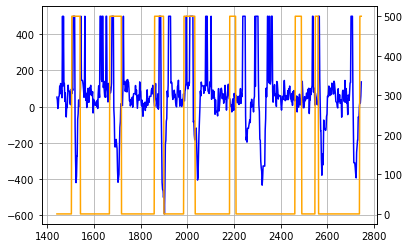

perason r: (0.09198811569928883, 0.014908637961771089)
cross-correlation: [5250000]
scipy-cross-corr: [0 0 0 ... 0 0 0]


In [19]:
x, y = plot_both(df, 1000, 1700)